# Finite Elements Method

利用Galerkin投影解决二阶常微分方程问题

$$
    \frac{d}{dx}(c(x)\frac{d}{dx}u(x)) + s(x)u(x) = f(x)
$$

In [20]:
using LinearAlgebra
using Plots
pyplot();

## 0-Dirichlet Boundary Condition

以下是关于Dirichlet边界条件的有限元方法的代码，Dirichlet零边界条件是

$$
    u(a) = u(b) = 0
$$

考虑弱解在$\mathcal{H}^1_0(a,b)$中，即$u,v \in \mathcal{H}^1_0$，利用格林公式，边界项 $u(x)v^{\prime}(x) = 0$，则有

$$
    (f,v) = \int_a^b c(x)u^{\prime}(x)v^{\prime}(x)dx + \int_a^b s(x)u(x)v(x) dx = a(u,v)
$$

In [21]:
begin
    function fem(c,s,f,a,b,n)
         # Define the grid.
    h = (b-a)/n
    x = @. a + h*(0:n)
    # Templates for the subinterval matrix and vector contributions.
    Ke = [1 -1; -1 1]
    Me = (1/6)*[2 1; 1 2]
    fe = (1/2)*[1; 1]
    # Evaluate coefficient functions and find average values.
    cval = c.(x);   cbar = (cval[1:n]+cval[2:n+1]) / 2;
    sval = s.(x);   sbar = (sval[1:n]+sval[2:n+1]) / 2;
    fval = f.(x);   fbar = (fval[1:n]+fval[2:n+1]) / 2;
    # Assemble global system, one interval at a time.
    K = zeros(n-1,n-1);  
    M = zeros(n-1,n-1);     
    f = zeros(n-1);
    K[1,1] = cbar[1]/h;   M[1,1] = sbar[1]*h/3;  f[1] = fbar[1]*h/2;
    K[n-1,n-1] = cbar[n]/h;  M[n-1,n-1] = sbar[n]*h/3;  f[n-1] = fbar[n]*h/2;
    for k in 2:n-1
        K[k-1:k,k-1:k] += (cbar[k]/h) * Ke
        M[k-1:k,k-1:k] += (sbar[k]*h) * Me
        f[k-1:k] += (fbar[k]*h) * fe
    end
    # Solve system for the interior values.
    u = (K+M) \ f
    u = [0; u; 0]      # put the boundary values into the result
    return x,u
        
    end
end

fem (generic function with 1 method)

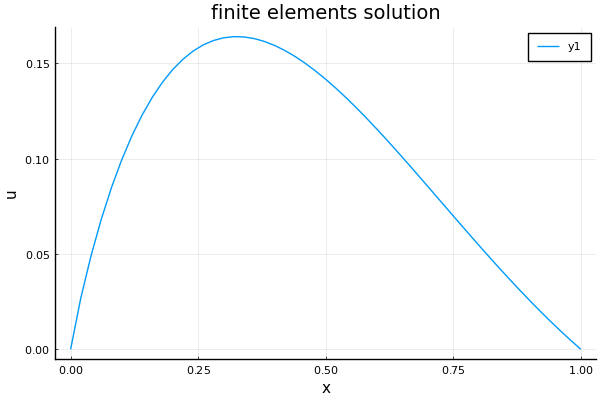

In [22]:
begin
    c = x -> x^2;
    s = x -> 4;
    f = x -> sin(π*x);
    
    x, u = fem(c, s, f, 0, 1, 50);
    plot(x, u, xaxis=("x"), yaxis=("u"), title="finite elements solution");
end

## 0-Neumann Boundary Conditions

Neumann Boundary Problems 中，我们考虑弱解的空间是$\mathcal{H}_*^1 = \{f: f \in L^2(a,b), f^{\prime} \in L^2(a,b) , f^{\prime}(a) = f^{\prime}(b) = 0\}$ 利用格林公式，边界项 $u(x)v^{\prime}(x) = 0$，因$v \in \mathcal{H}_*^1$，则有

$$
    (f,v) = \int_a^b c(x)u^{\prime}(x)v^{\prime}(x)dx + \int_a^b s(x)u(x)v(x) dx = a(u,v)
$$

这个结果与Dirichlet边界条件是一样的. 

两者的不同之处在于Neumann边界条件中，选取的$V_n$的维数是$n + 1$而不是$n - 1$，原因是在边界上非0. 

In [37]:
begin
    function femneumann(c,s,f,a,b,n)
         # Define the grid.
    h = (b-a)/n
    x = @. a + h*(0:n)
    # Templates for the subinterval matrix and vector contributions.
    Ke = [1 -1; -1 1]
    Me = (1/6)*[2 1; 1 2]
    fe = (1/2)*[1; 1]
    # Evaluate coefficient functions and find average values.
    cval = c.(x);   cbar = (cval[1:n]+cval[2:n+1]) / 2; 
    sval = s.(x);   sbar = (sval[1:n]+sval[2:n+1]) / 2; 
    fval = f.(x);   fbar = (fval[1:n]+fval[2:n+1]) / 2;
    # Assemble global system, one interval at a time.
    K = zeros(n+1,n+1);  
    M = zeros(n+1,n+1);     
    f = zeros(n+1);
    K[1,1] = cbar[1]/h;   M[1,1] = sbar[1]*h/3;  f[1] = fbar[1]*h/2; 
    K[1,2] = -cbar[1]/h;  K[2,1] = -cbar[1]/h; 
    M[1,2] = sbar[1]*h/6; M[2,1] = sbar[1]*h/6;
    K[2,2] = cbar[1]/h;   M[2,2] = sbar[1]*h/3;  f[2] = fbar[1]*h/2;
    K[n,n] = cbar[n]/h;  M[n,n] = sbar[n]*h/3;  f[n] = fbar[n]*h/2;
    K[n,n+1] = -cbar[n]/h;  K[n+1,n] = -cbar[n]/h; 
    M[n,n+1] = sbar[n]*h/6; M[n+1,n] = sbar[n]*h/6;
    K[n+1,n+1] = cbar[n]/h;  M[n+1,n+1] = sbar[n]*h/3;  f[n+1] = fbar[n]*h/2;
#    for k in 2:n+1
    for k in 3:n
        K[k-1:k,k-1:k] += (cbar[k]/h) * Ke
        M[k-1:k,k-1:k] += (sbar[k]*h) * Me
        f[k-1:k] += (fbar[k]*h) * fe
    end
    # Solve system for the interior values.
    u = (K+M) \ f
    
    return x,u
        
    end
end

femneumann (generic function with 1 method)

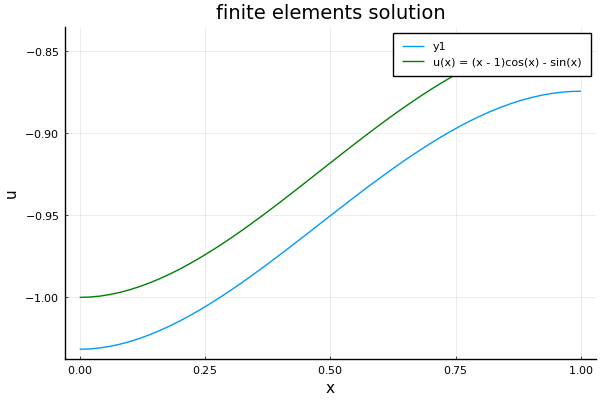

In [48]:
begin
    c = x -> -1;
    s = x -> 1;
    f = x -> -2*sin(x);
    
    x, u = femneumann(c, s, f, 0, 1, 50);
    plot(x, u, xaxis=("x"), yaxis=("u"), title="finite elements solution");
    plot!(x, (x .- 1) .* cos.(x) .- sin.(x), label="u(x) = (x - 1)cos(x) - sin(x)", color=:green)

end